<center>
<h2> Vehicle Sales Data Analytics  </h2> 

<h3 style="color: #3366ff;">Notebook Overview</h3>

<p>This Jupyter Notebook provides a comprehensive and integrated analysis of the <em>"Vehicle Sales and Market Trends Dataset"</em>. This dataset offers a wealth of information about vehicle sales transactions, including details such as make, model, condition, selling prices, and more. The unique aspect of this notebook is the simultaneous visualization and reporting of insights, which allows for a more integrated and comprehensive understanding of the data.</p>

<h4 style="color: #3366ff;">Key Sections:</h4>

<ul>
<li><strong>Data Import and Exploration:</strong> The notebook begins with the import of necessary libraries and the loading of the dataset. It then explores the dataset's structure, dimensions, and missing values.</li>

<li><strong>Data Cleaning and Transformation:</strong> This section focuses on cleaning and transforming the data. It handles missing values, converts data types, and addresses inconsistencies in categorical columns.</li>

<li><strong>Integrated Data Visualization and Reporting:</strong> After cleaning the data, the notebook visualizes the dataset using various plots and charts, while simultaneously reporting insights. It performs correlation analysis, highlights key observations and trends, and suggests recommendations or further actions based on the analysis.</li>
</ul>

<p>Throughout the notebook, various Python packages are utilized, including pandas, matplotlib, seaborn, and scikit-learn, among others. These packages enable data manipulation, visualization, and statistical analysis to extract meaningful insights from the dataset.</p>

<p>Overall, this notebook serves as a comprehensive guide to understanding the characteristics and patterns within the vehicle sales data, helping to understand market trends, consumer preferences, and pricing strategies.</p>


<h3 style="color: #3366ff;">1. Data Import and Exploration</h3>

In [1]:
# Importing necessary libraries for data analysis and visualization

# numpy is used for numerical computations in Python
import numpy as np

# pandas is used for data manipulation and analysis
import pandas as pd

# matplotlib.pyplot is a plotting library used for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# seaborn is a Python data visualization library based on matplotlib
import seaborn as sns

# warnings is a standard Python library used to suppress warning messages
import warnings

# termcolor library is used to color the text in the console
from termcolor import colored

# Ignore all warning messages that might appear during the execution of the program
warnings.filterwarnings('ignore')

# Set the aesthetic style of the plots. This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements
sns.set_style()

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

The describe_data function takes a pandas DataFrame as an argument and prints out various pieces of information about the data:

In [2]:
def describe_data(data):
    print(colored("Shape of the data:", 'blue'))
    print(data.shape)
    
    print(colored("\nColumns in the data:", 'green'))
    print(data.columns)
    
    print(colored("\nInformation about the data:", 'cyan'))
    data.info()
    
    print(colored("\nDescription of numerical data:", 'magenta'))
    print(data.describe().T)
    
    print(colored("\nDescription of non-numerical data:", 'yellow'))
    print(data.describe(exclude='number').T)

Firstly, I will read the csv file:

In [3]:
# Use the function
data = pd.read_csv('car_prices.csv')


<h4 style="color: #3366ff;"> Understanding Data 📊</h4>

In [4]:
describe_data(data)

Shape of the data:
(457731, 16)

Columns in the data:
Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457731 entries, 0 to 457730
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          457731 non-null  int64  
 1   make          449532 non-null  object 
 2   model         449460 non-null  object 
 3   trim          449203 non-null  object 
 4   body          446659 non-null  object 
 5   transmission  405706 non-null  object 
 6   vin           457731 non-null  object 
 7   state         457731 non-null  object 
 8   condition     445929 non-null  float64
 9   odometer      457641 non-null  float64
 10  color         457088 non-null  object 
 11  interior      457088 

<h3 style="color: #3366ff;">2. Data Cleaning and Transformation</h3>

<h4 style="color: #3366ff;"> Data Cleaning 📊</h4>

Here is the column names of data and the values are the percentage of missing values in each column.

In [5]:
data.isnull().sum()/data.count()*100

year             0.000000
make             1.823897
model            1.840208
trim             1.898474
body             2.478849
transmission    12.823325
vin              0.000000
state            0.000000
condition        2.646610
odometer         0.019666
color            0.140673
interior         0.140673
seller           0.000000
mmr              0.003933
sellingprice     0.001966
saledate         0.001966
dtype: float64

As we see there are many values missing.

I'm going to remove the missing values. We have good number of data points and the missing values is less the 5% in almost all of the columns besides of 'Transmission' column as it has 13% of values missing. 

In [6]:
# We are filling missing values with 'Automatic' because it is the most used transmission type.

data['transmission'].fillna('automatic', inplace=True)

This will remove any rows in the dataset (data) that contain missing or incomplete information.

In [7]:
data.dropna(axis=0, inplace=True)

Now, let's verify the percentage of missing values in each column of our dataset. 

In [8]:
data.isnull().sum()/data.count()*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

We have successfully removed all the missing values either by removing them or replacing them with the alternative.

<h4 style="color: #3366ff;"> Data Transforming 📊</h4>

 Let's convert the 'year' column in our 'data' DataFrame from its current data type to a datetime data type. This is particularly important when dealing with time series data, as it allows us to leverage the powerful time-based functionalities provided by pandas.

In [9]:
# Since year is a time based data, the best approach is to convert it into datetime data type.

data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year

Then, let's see the unique values in the 'condition' column of our dataset.

In [10]:
data['condition'].unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 49., 17., 19.,
       29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46., 36.,
       35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12., 14.,
       11., 13.])

We get an array of distinct values that the 'condition' column can take. These values represent different conditions in our vehicle sales data.



The condition column has values between 1 to around 50 which is not correct. It should be between 1 to 5 as it does not look correct to me to have condition 45.

Let's change it into 1 to 5.

In [11]:
data['condition'].replace(range(10, 21), 1, inplace=True)
data['condition'].replace(range(20, 31), 2, inplace=True)
data['condition'].replace(range(30, 41), 3, inplace=True)
data['condition'].replace(range(40, 51), 4, inplace=True)

In [12]:
data['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [13]:
data['interior'].unique()

array(['black', 'beige', 'tan', 'brown', 'gray', '—', 'burgundy', 'white',
       'silver', 'off-white', 'red', 'yellow', 'green', 'purple', 'blue',
       'orange', 'gold'], dtype=object)

We can see that 'Color' and 'Interior' column has value '-' which is not correct, there might be any other color but since about that I have no knowledge or idea, i'll use 'MultiColor' as value. This way, we know it is our custom used value yet it will give meaning to the data.

In [14]:
data['color'].replace('—', 'multicolor', inplace=True)
data['interior'].replace('—', 'multicolor', inplace=True)

In [15]:
data['saledate'] = pd.to_datetime(data['saledate'], utc=True, format='mixed').dt.date

Saledate is also datetime column but it has simply object as data-type. We will convert it into datetime and keep the date part only discarding the time part.

In [16]:
data['body'] = data['body'].str.lower()

The 'Model', 'Trim', 'Vin', and 'Seller' columns won't significantly aid our analysis. 'Model' and 'Trim' can cause high dimensionality, 'Vin' is unique per vehicle and doesn't offer aggregate insights, and 'Seller' is not necessary for a general vehicle sales analysis. Therefore, we'll drop these columns.

In [17]:
data = data.drop(['model', 'trim', 'vin', 'seller'], axis=1)

Let's show the head...

In [18]:
data.head()

,year,make,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
0,2015,Kia,suv,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0,2014-12-16
1,2015,Kia,suv,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0,2014-12-16
2,2014,BMW,sedan,automatic,ca,4.0,1331.0,gray,black,31900.0,30000.0,2015-01-14
3,2015,Volvo,sedan,automatic,ca,4.0,14282.0,white,black,27500.0,27750.0,2015-01-28
4,2014,BMW,sedan,automatic,ca,4.0,2641.0,gray,black,66000.0,67000.0,2014-12-18


## Data Visualization

Let's define a function to create a Count Plot so we don't have to write all the necessary lines again and again.

In [19]:
def countplot(col, label, rotation=0, size=(12,6)):
    '''
    Create Count Plot using seaborn library.
    It takes four arguments.

    col (str): The column used to create countplot
    label (str): Name of x-label and it is also used as title.
    rotation (int): How much you want to rotate the x-ticks.
    size (tuple): It is a tuple and takes the size for figure in (width, height) format.
    '''
    plt.figure(figsize=size)
    plt.title(f'Count by Car {label}', fontsize=20)
    sns.countplot(x=data[col], palette='viridis')
    plt.xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    plt.ylabel('Count', fontsize=16)

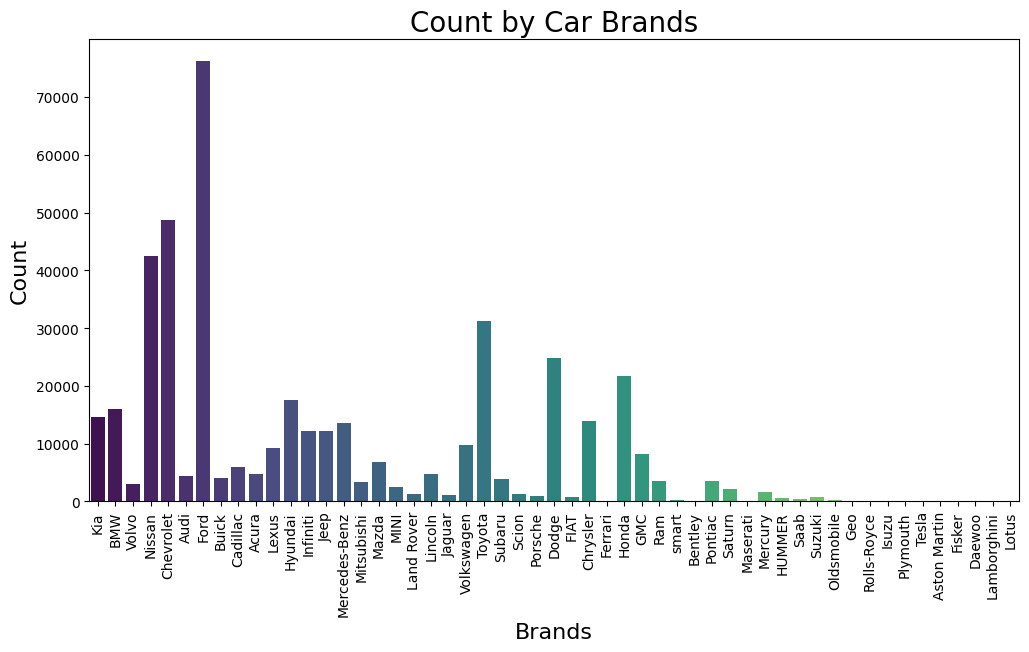

In [20]:
countplot('make', 'Brands', 90)

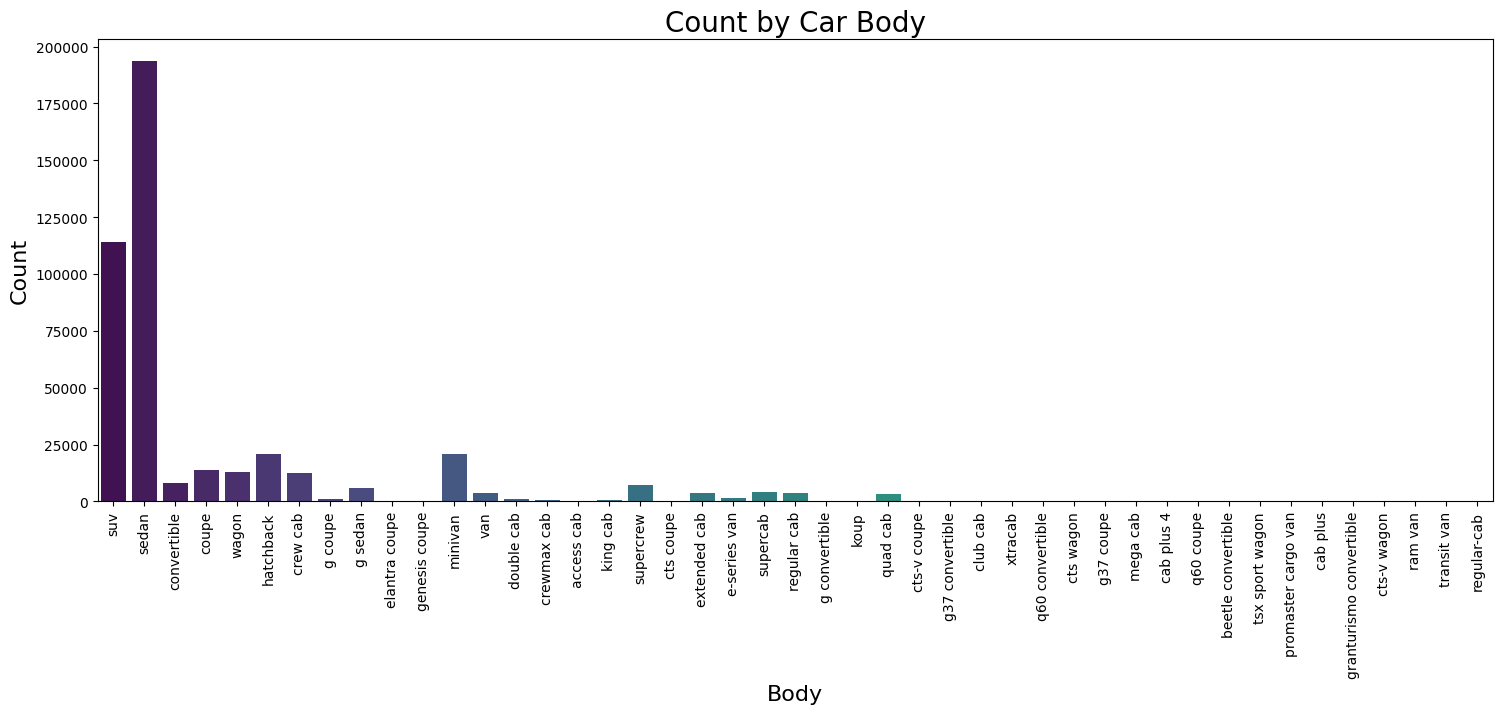

In [21]:
countplot('body', 'Body', 90, (18,6))

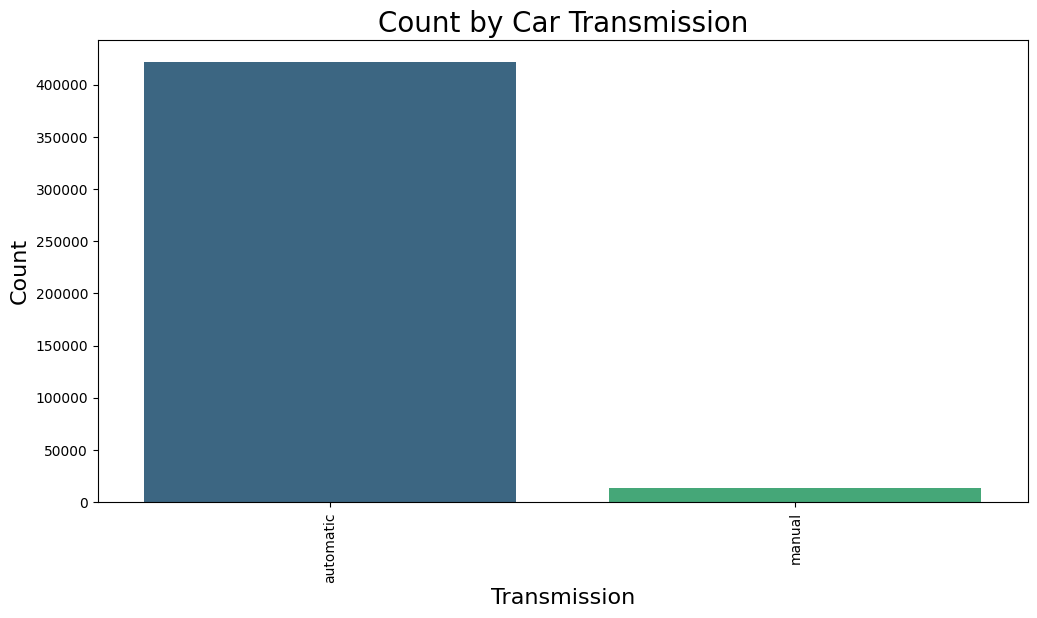

In [22]:
countplot('transmission', 'Transmission', 90)

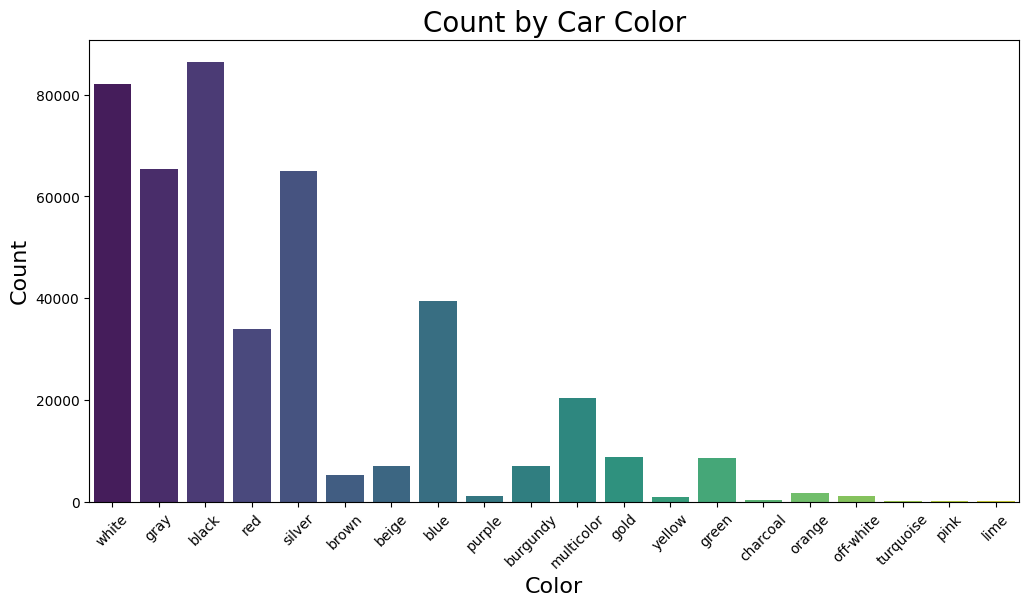

In [23]:
countplot('color', 'Color', 45)

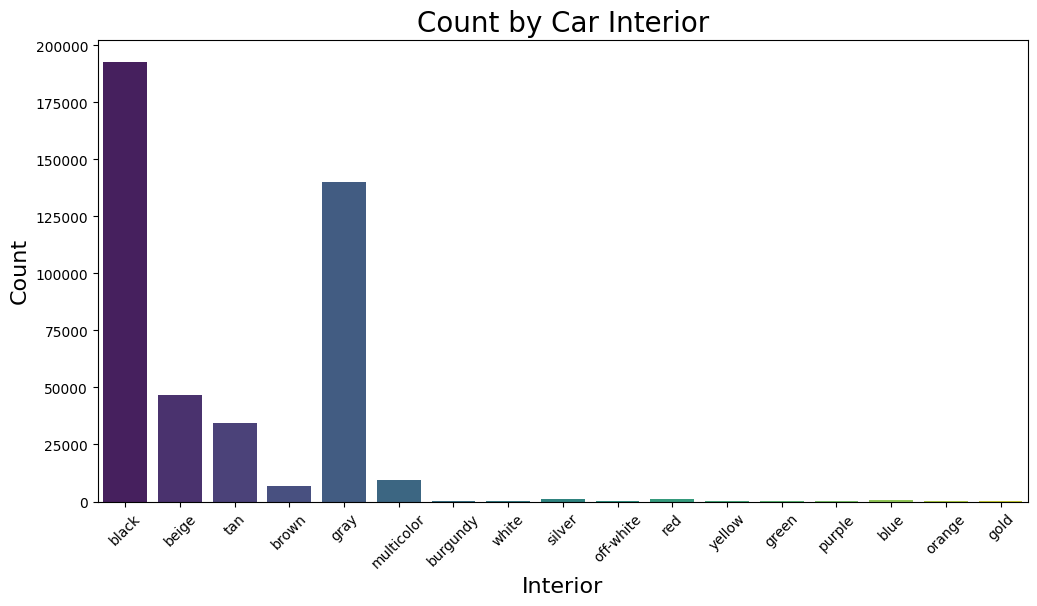

In [24]:
countplot('interior', 'Interior', 45)

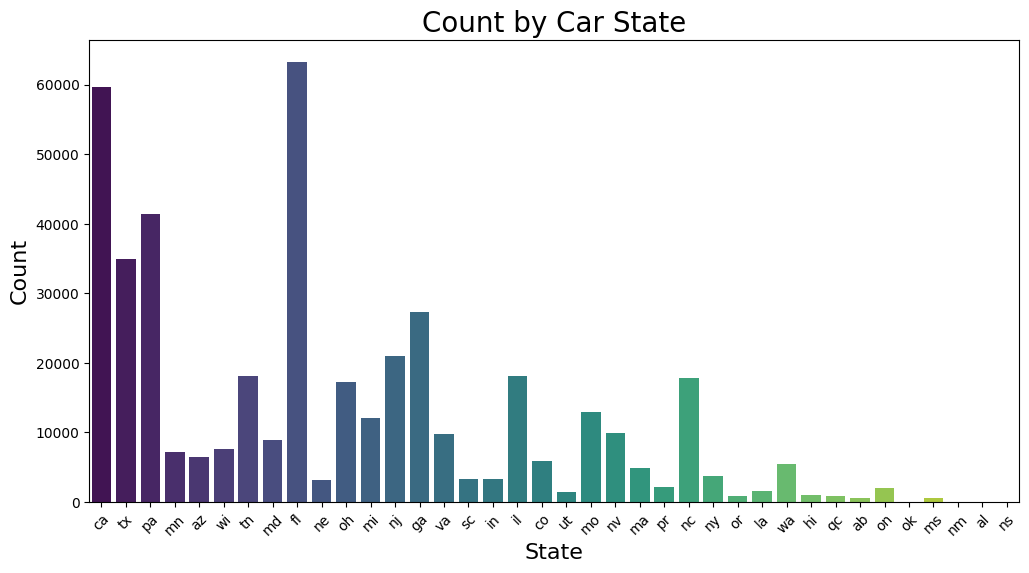

In [25]:
countplot('state', 'State', 45)

We have checked all necessary categorical columns there are some columns left such as 'Model', 'Trim', 'Vin', and 'Seller'. These columns have a lot of data points which will not help us understanding data or anything related that much.

In [26]:
def boxplot(col, label):
    '''
        Create Boxplot from the given data series.

        col (string): Used as column for dataframe.

        label (string): Used as label and title for chart.
    
    '''

    plt.figure(figsize=(10,6))
    sns.boxplot(data[col], palette='viridis')
    plt.title(label, fontsize=20)
    plt.ylabel(label, fontsize=16)


def histplot(col, label):
    '''
        Create Boxplot from the given data series.

        col (string): Used as column for dataframe.

        label (string): Used as label and title for chart.
    
    '''

    plt.figure(figsize=(10,6))
    sns.histplot(data[col], palette='viridis')
    plt.title(label, fontsize=20)
    plt.xlabel(label, fontsize=16)

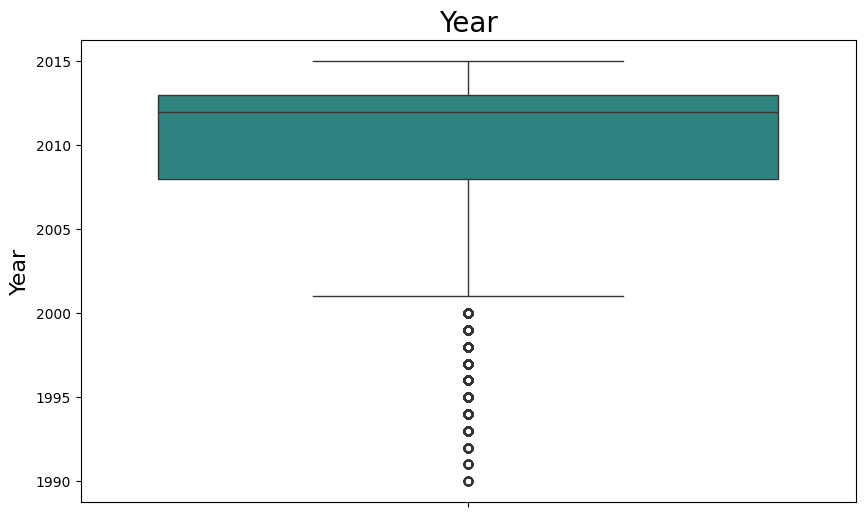

In [27]:
boxplot('year', 'Year')

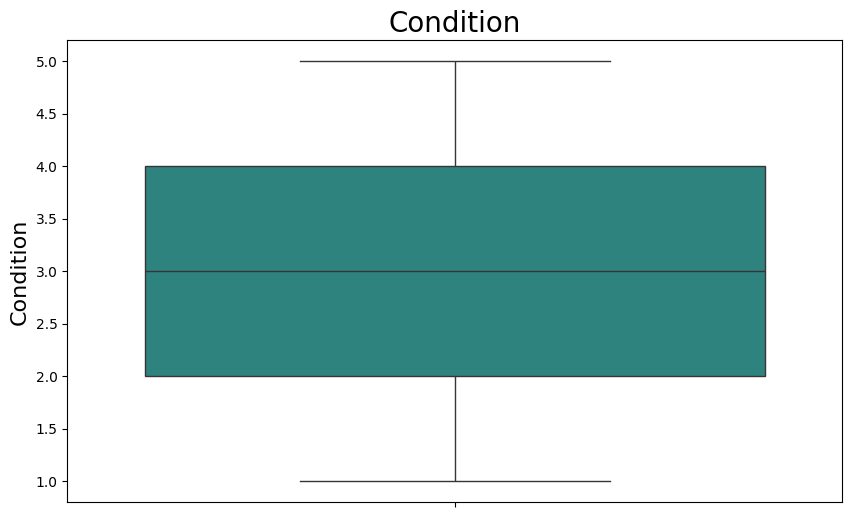

In [28]:
boxplot('condition', 'Condition')

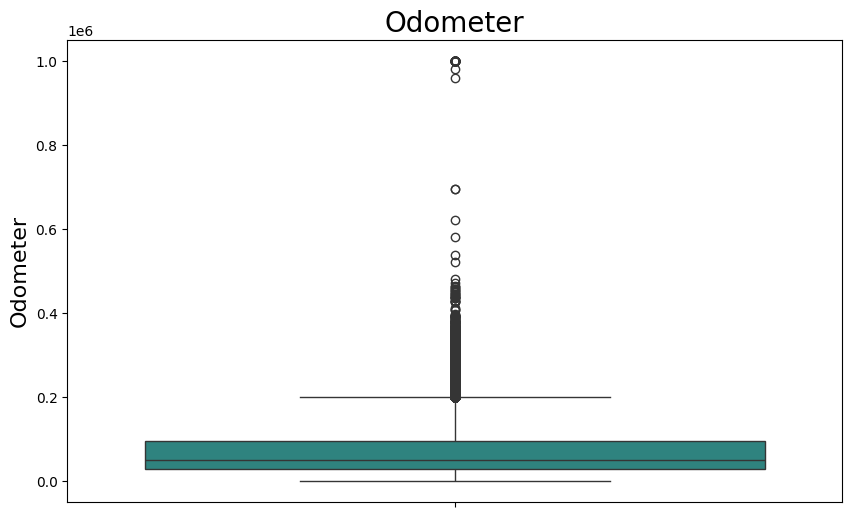

In [29]:
boxplot('odometer', 'Odometer')

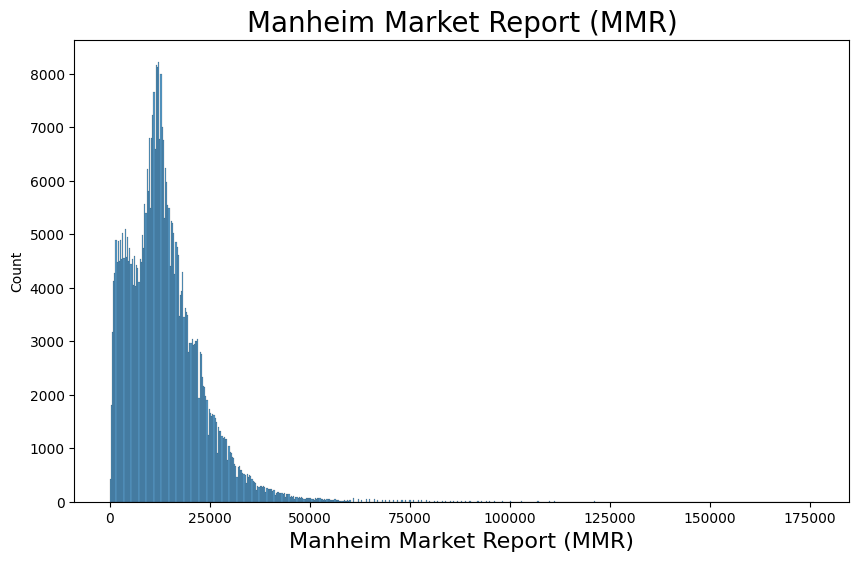

In [30]:
histplot('mmr', 'Manheim Market Report (MMR)')

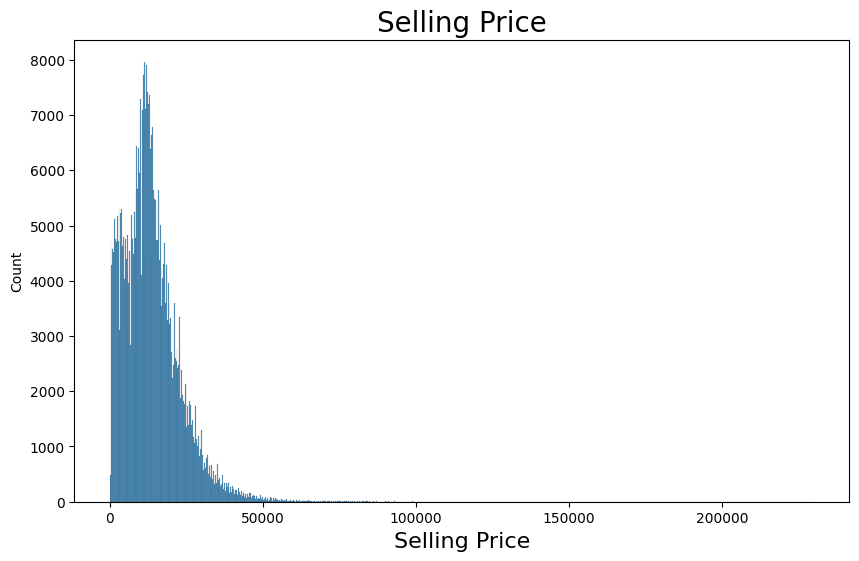

In [31]:
histplot('sellingprice', 'Selling Price')

Checking out these results we can see that all these columns have number of outliers and the 'MMR', 'Selling Price' column is highly skewed to the right.

In [32]:
cat_col = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller']
num_col = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

<Axes: >

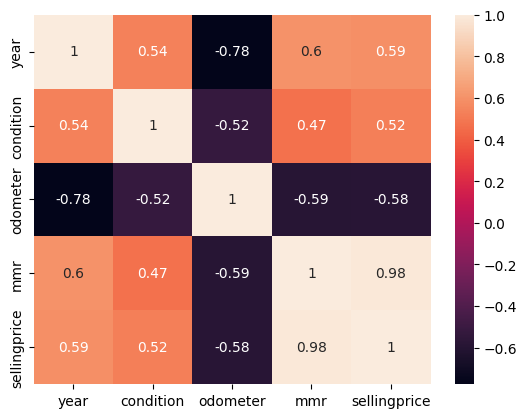

In [33]:
sns.heatmap(data[num_col].corr(), annot=True)

In [34]:
data.groupby('make')[['sellingprice', 'condition']].mean().sort_values(by=['sellingprice', 'condition'], ascending=False)

,sellingprice,condition
make,,
Rolls-Royce,151080.000000,3.900000
Ferrari,131555.555556,3.555556
Lamborghini,111500.000000,4.000000
Bentley,73883.132530,3.265060
Tesla,70714.285714,4.000000
Aston Martin,54961.111111,3.166667
Fisker,46791.666667,3.500000
Maserati,41333.333333,3.059524
Lotus,40800.000000,2.000000


Text(0, 0.5, 'Selling Price')

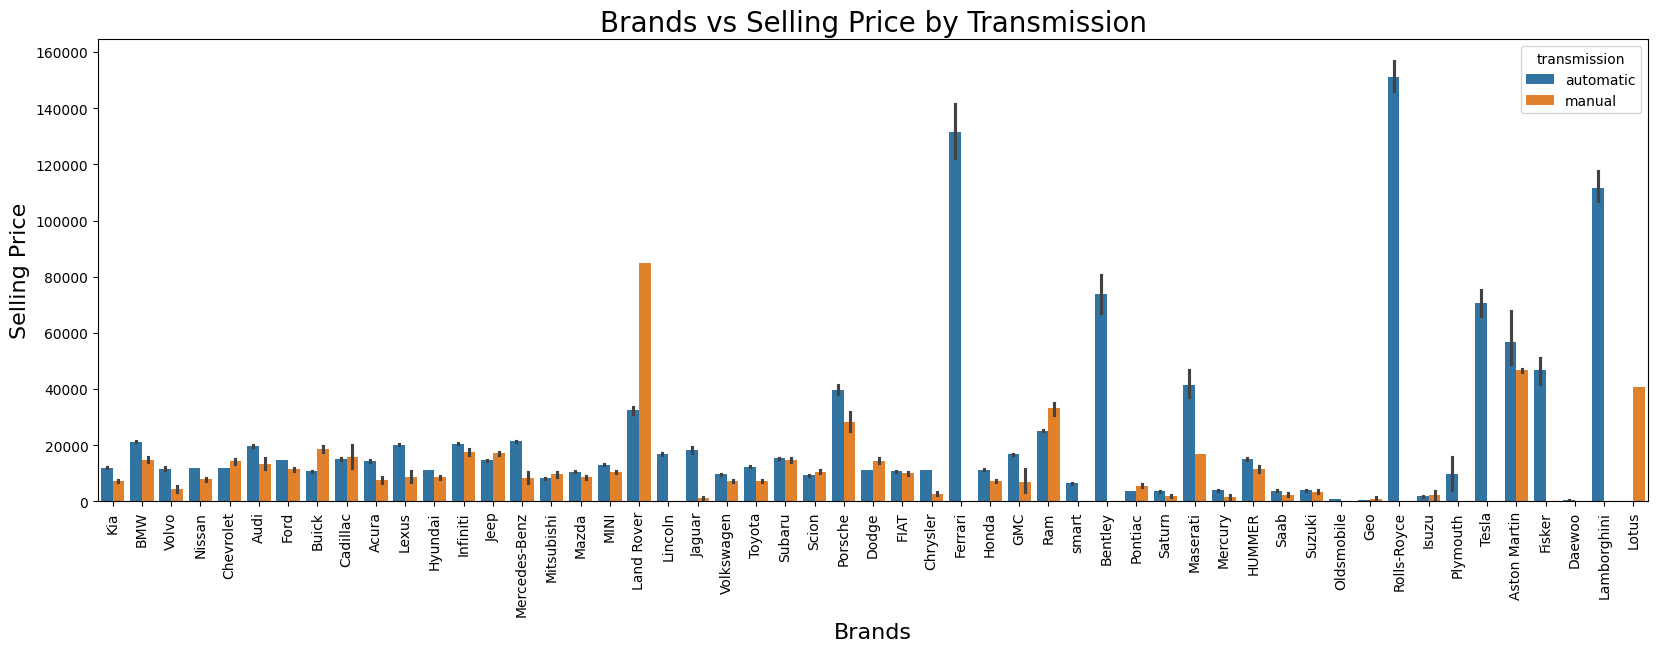

In [35]:
plt.figure(figsize=(20,6))
plt.title('Brands vs Selling Price by Transmission', fontsize=20)
sns.barplot(x=data['make'], y=data['sellingprice'], hue=data['transmission'])
plt.xlabel('Brands', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'MMR')

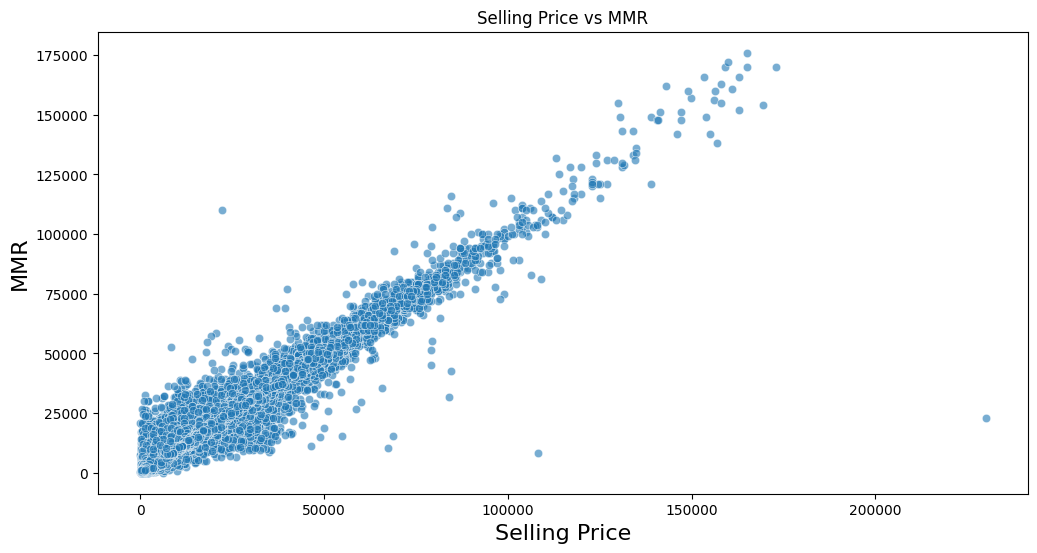

In [36]:
plt.figure(figsize=(12,6))
plt.title('Selling Price vs MMR')
sns.scatterplot(x=data['sellingprice'], y=data['mmr'], palette='magma', alpha=0.6)
plt.xlabel('Selling Price', fontsize=16)
plt.ylabel('MMR', fontsize=16)

Text(0, 0.5, 'MMR')

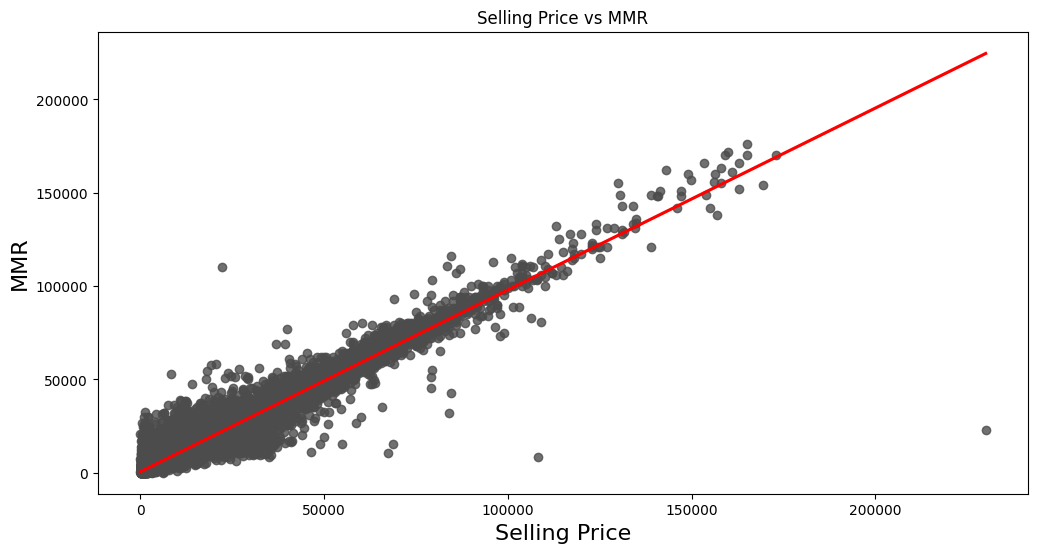

In [37]:
plt.figure(figsize=(12,6))
plt.title('Selling Price vs MMR')
sns.regplot(x=data['sellingprice'], y=data['mmr'], marker='o', color=".3", line_kws=dict(color="r"))
plt.xlabel('Selling Price', fontsize=16)
plt.ylabel('MMR', fontsize=16)

Text(0, 0.5, 'MMR')

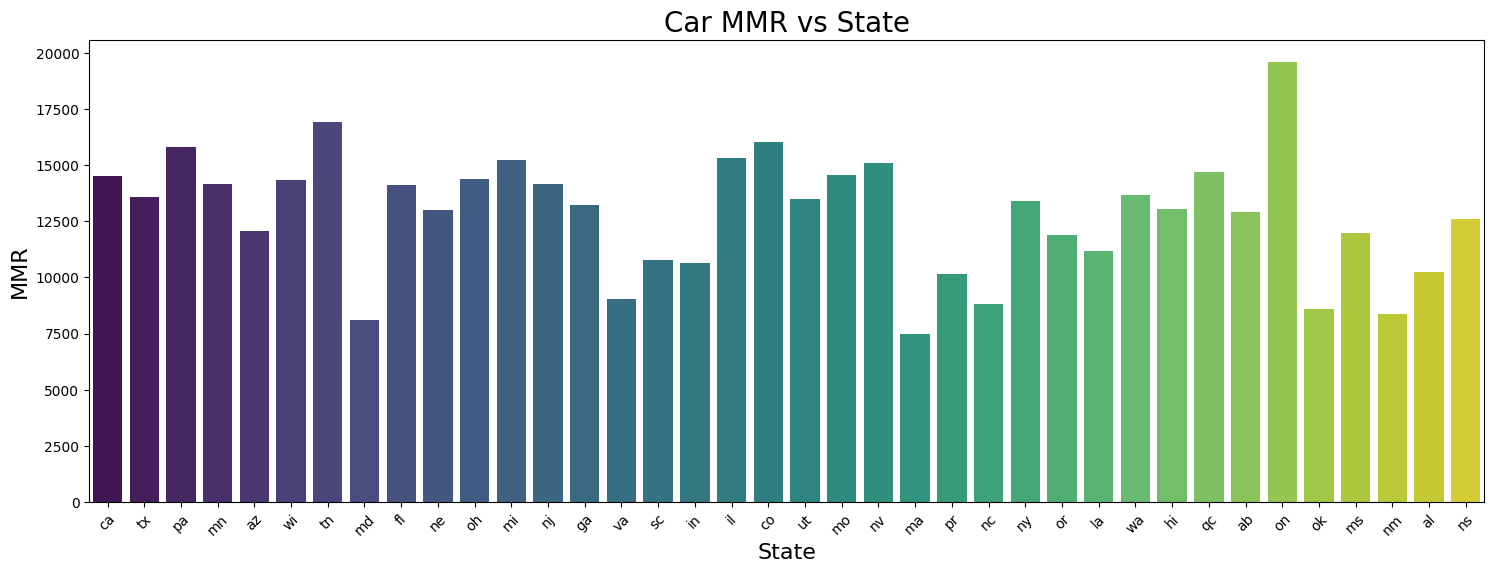

In [38]:
plt.figure(figsize=(18,6))
plt.title('Car MMR vs State', fontsize=20)
sns.barplot(x=data['state'], y=data['mmr'], errorbar=None, palette='viridis')
plt.xlabel('State', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('MMR', fontsize=16)

Text(0, 0.5, 'Selling Price')

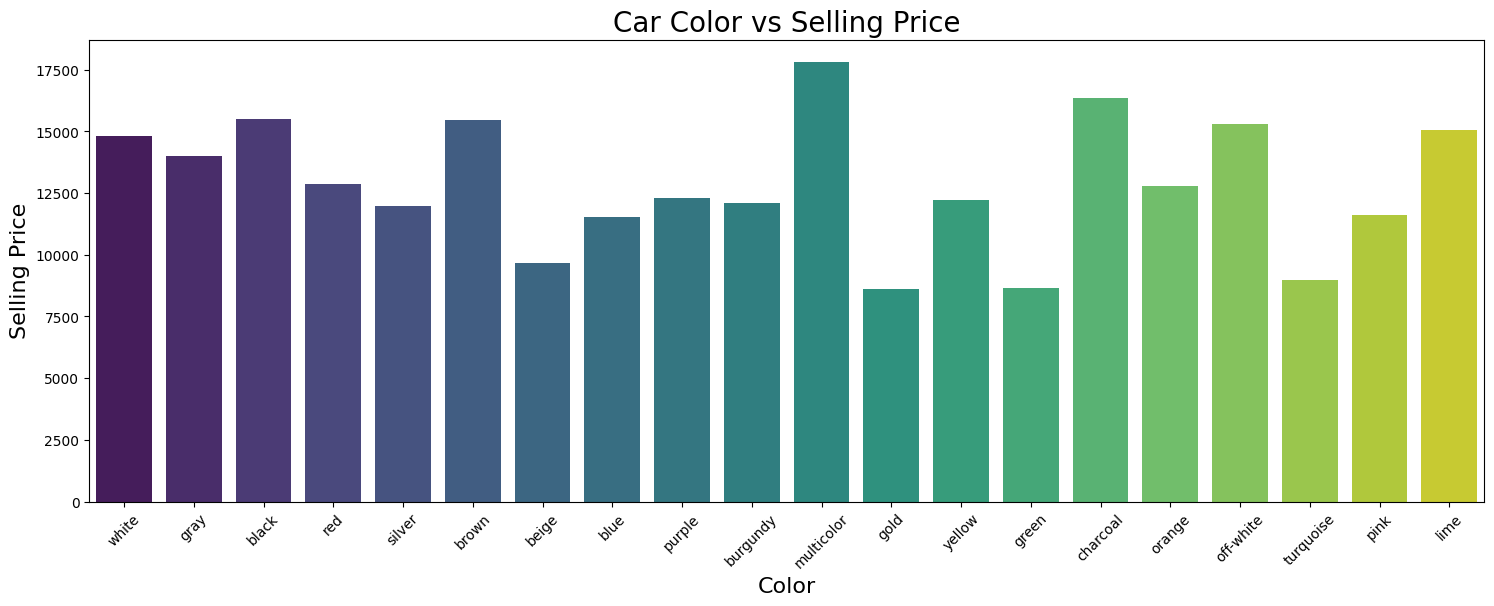

In [39]:
plt.figure(figsize=(18,6))
plt.title('Car Color vs Selling Price', fontsize=20)
sns.barplot(data=data, x='color', y='sellingprice', errorbar=None, palette='viridis')
plt.xlabel('Color', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'Selling Price')

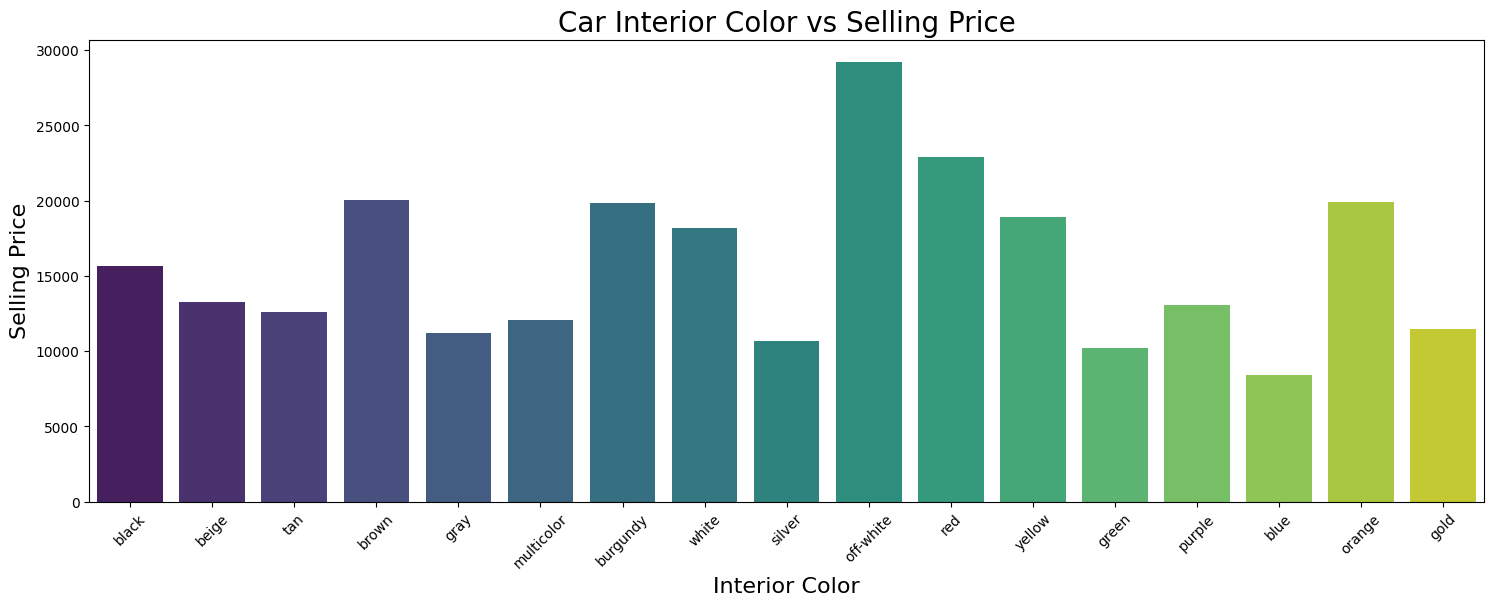

In [40]:
plt.figure(figsize=(18,6))
plt.title('Car Interior Color vs Selling Price', fontsize=20)
sns.barplot(data=data, x='interior', y='sellingprice', errorbar=None, palette='viridis')
plt.xlabel('Interior Color', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'Car Travelled')

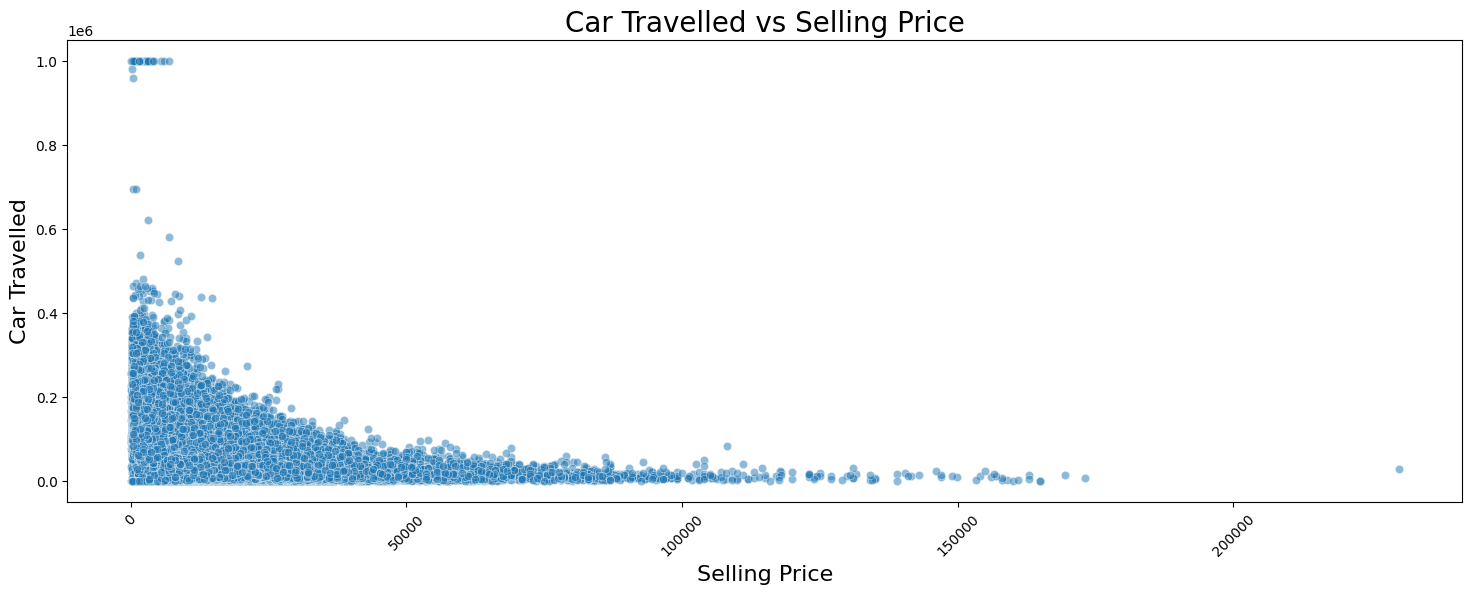

In [41]:
plt.figure(figsize=(18,6))
plt.title('Car Travelled vs Selling Price', fontsize=20)
sns.scatterplot(x=data['sellingprice'], y=data['odometer'], palette='viridis', alpha=0.5)
plt.xlabel('Selling Price', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Car Travelled', fontsize=16)

Text(0, 0.5, 'Selling Price')

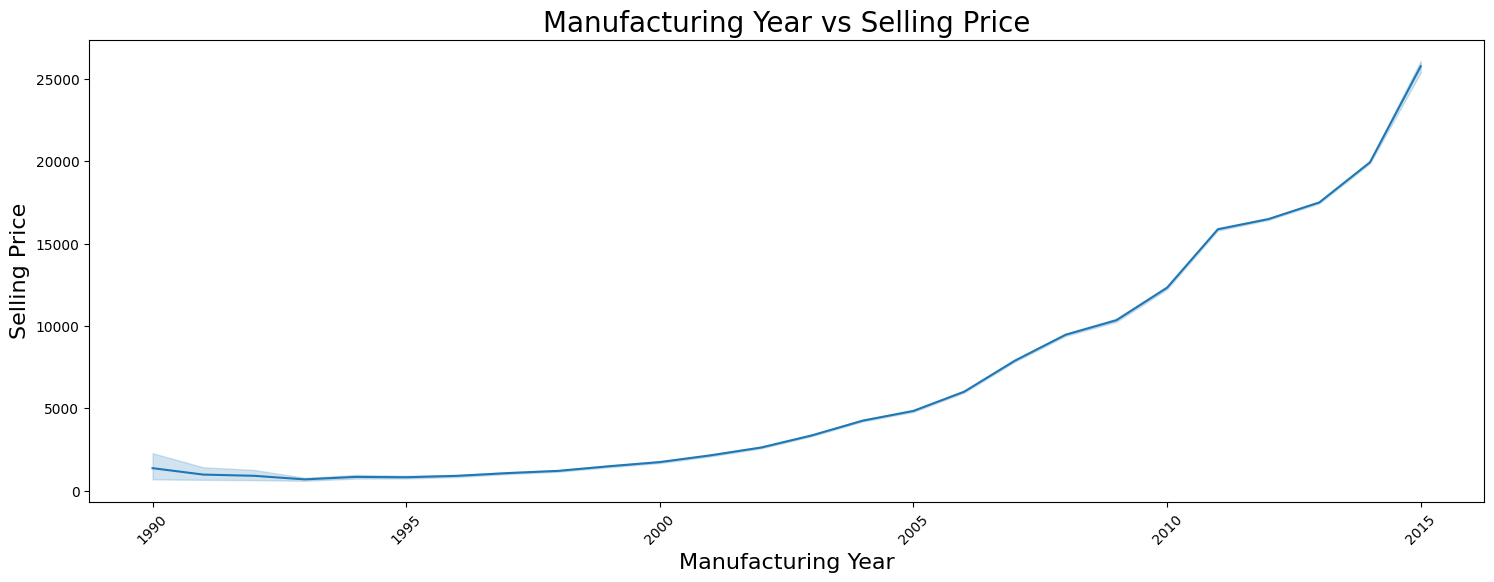

In [42]:
plt.figure(figsize=(18,6))
plt.title('Manufacturing Year vs Selling Price', fontsize=20)
sns.lineplot(x=data['year'], y=data['sellingprice'], palette='viridis')
plt.xlabel('Manufacturing Year', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'Selling Price')

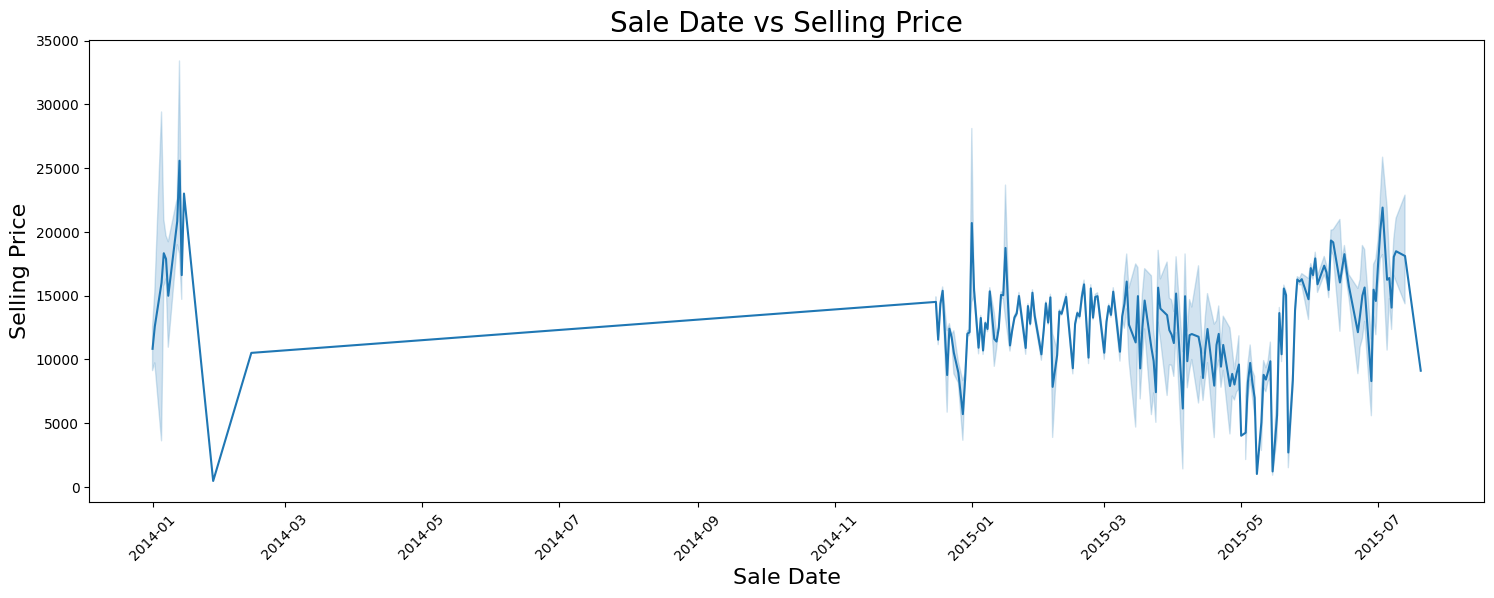

In [43]:
plt.figure(figsize=(18,6))
plt.title('Sale Date vs Selling Price', fontsize=20)
sns.lineplot(x=data['saledate'], y=data['sellingprice'], palette='viridis')
plt.xlabel('Sale Date', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

## Report

After finishing the EDA let's see what we have.

1. We have 558837 rows and 16 columns at first after importing the data. These 16 columns have 5 integer type columns and rest 11 are object or we can say string type columns.

2. As per the statistical analysis we can say that the Manheim Market Report (MMR) and Selling Price are quite close. The max of odometer is 999999 which seems very high but it is not impossible.

3. We have some cars manufactured in 1982 this might result as having some Vintage Cars in the dataset.

4. There are lots of missing values in dataset. Transmission has the highest missing values about 13% which is quite high. Other than this Make, Model, Trim, Body, and Condition have 1%-2% missing values. Besides these other have less than 1% missing values.
5. We have Year and Sale date columns which should be of datetime data type but they are in int and object type so we'll convert them.
6. The condition column have values such as 45, 59, 34 etc but this is not correct as it is a column which should have values between 1-5 as rating.
7. The 'Color' and 'Interior' columns has data point with values '-' which replaced by 'Multicolor' as we don't want to add more values to a particular color.
8. 'Body' column values have some inconsistensies like Sedan, sedan or SUV, suv.
9. Ford, Chevrolet, Nissan, Toyota, and Dodge are the top 5 brands by the count.
10. Sedan and SUV are the top 2 body types used in cars.
11. Automtic transmission is most counted, it also maked the dataset imbalanced based on transmission.
12. There are different color cars but 'Black' and 'Grey' are the most used interior color.
13. Florida and California have 70k-80k and more cars while all other are below 50k cars.
14. The minimum and maximum of manufactured year of car is 2000 and 2015 but there are some outlier cars whose manufactured year is 1990 or less.
15. Most of the condition of cars come between 2 to 4 rating but there are some cars whose condition is either 1 or 5 too.
16. The maximum of odometer display is about 200000 but there are many outliers too such as some cars even travelled 999999 which looks very inconvincing.
17. The MMR and Selling price is quite identical. There is high spike of cars between the prices of 10000-20000 and both are right skewed data.
18. The Sale date of cars are from year 2015 and last two months of year 2014 whereas the first quarter of year 2014 is treated as outlier.
19. The correlation of the columns fall between -0.78 to 0.98, which is an indication that there is some multicolinearity.
20. The avearge car price of costliest car is Rolls Royce with price of $153456.25 while the cheapest car is DOdge with price of $450.00.
21. The sellin price of automatic transmission car brands is highest besides of two brands Land Rover and Lotus. Lotus does not have car of automatic transmission while Rolls-Royce does not have car of manual transmission.
22. Our scatterplot and also regplot shows that MMR and Selling Price is very much correlated but it also showing there are some of data points which are very much off in respect of other.
23. Car color and Interior color is not very affecting variable for the Selling price.
24. The distance travelled by car and selling price does have a negative relation but it is not vey much decisive in case of Selling price.
25. Cars manufactured after year 2000 shows and upward trend in respect of Selling price. While there is no trend between sale date and selling price, it just kind of random walk.